<a href="https://colab.research.google.com/github/ruchipancha/IST526_Assignment5/blob/main/Assignment_5_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Assignment

## Creating Time Series Data

In [13]:
from numpy.random import default_rng
rng = default_rng(12345)
# print(rng)

# vals = rng.standard_normal(10)
mean = 0,
std = 1
n_points = 2000
drift_factor = 15

# simulate dummy data
X_t = rng.normal(mean, std, n_points) + drift_factor
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza simulated data
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(            
  rangeslider_visible = True 
)
fig.show()

,Date,X
2020-06-20,2020-06-20,13.576175
2020-06-21,2020-06-21,16.263728
2020-06-22,2020-06-22,14.129338
2020-06-23,2020-06-23,14.740827
2020-06-24,2020-06-24,14.924657
...,...,...
2025-12-06,2025-12-06,14.814669
2025-12-07,2025-12-07,15.109601
2025-12-08,2025-12-08,15.456858
2025-12-09,2025-12-09,15.397129


## Simulating AR(1) Process
$X_t = factor \times X_{t-1} + w_t$ \\



## factor = 0.9

In [17]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.9
w_std = 2.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-2.847650
2020-06-22,2020-06-22,-0.035428
2020-06-23,2020-06-23,-1.773209
2020-06-24,2020-06-24,-2.114234
...,...,...
2021-01-01,2021-01-01,2.272036
2021-01-02,2021-01-02,3.417198
2021-01-03,2021-01-03,5.505487
2021-01-04,2021-01-04,5.387057


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



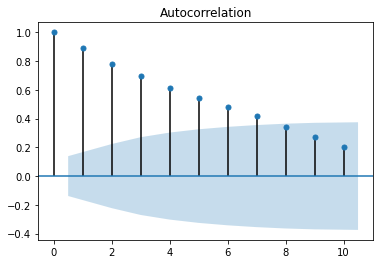

[1.         0.88944999 0.78126476 0.69253568 0.61222313 0.54068917
 0.47983886 0.41903998 0.34160655 0.27398769 0.20480883]


In [18]:
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

Comparing to the ACF graph provided in the assignment, we can see that the correlation after 1 lag is 0.5. Hence for an AR1 model, the factor value will be 0.5 

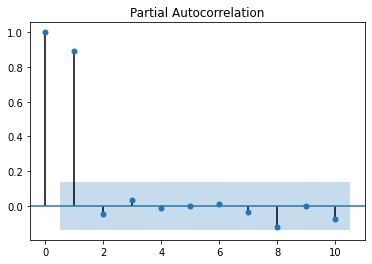

[ 1.00000000e+00  8.93919590e-01 -4.94550783e-02  3.47315375e-02
 -1.18792556e-02 -3.93716125e-04  1.14669172e-02 -3.63197458e-02
 -1.21924806e-01 -3.58034253e-03 -7.48944486e-02]


In [19]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)

## factor = 0.1

In [32]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.1
w_std = 2.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-2.847650
2020-06-22,2020-06-22,2.242692
2020-06-23,2020-06-23,-1.517054
2020-06-24,2020-06-24,-0.670052
...,...,...
2021-01-01,2021-01-01,0.340233
2021-01-02,2021-01-02,1.406388
2021-01-03,2021-01-03,2.570648
2021-01-04,2021-01-04,0.689184


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



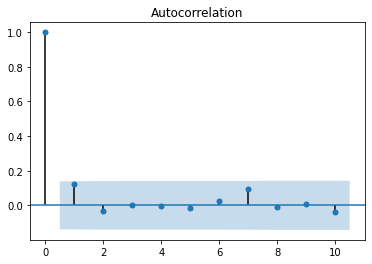

[ 1.          0.12040075 -0.03209101  0.00247506 -0.00458529 -0.01609887
  0.02556276  0.09362301 -0.00912423  0.00645419 -0.03930532]


In [33]:
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

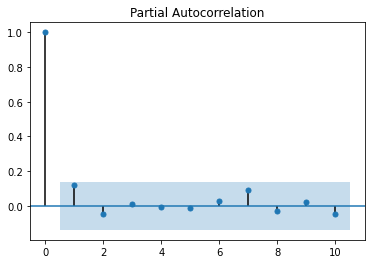

[ 1.          0.12100578 -0.04775684  0.0126144  -0.00826617 -0.01459661
  0.03027513  0.09029    -0.03130002  0.01937248 -0.04890421]


In [34]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)

## factor = 0.5

In [29]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.5
w_std = 2.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-2.847650
2020-06-22,2020-06-22,1.103632
2020-06-23,2020-06-23,-1.189508
2020-06-24,2020-06-24,-1.113100
...,...,...
2021-01-01,2021-01-01,0.069999
2021-01-02,2021-01-02,1.407365
2021-01-03,2021-01-03,3.133692
2021-01-04,2021-01-04,1.998965


Lag set to 10

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



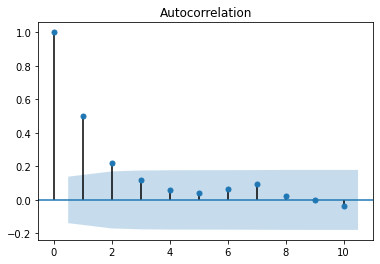

[ 1.          0.50296539  0.22091127  0.11686122  0.06040308  0.0382703
  0.06281649  0.09207996  0.02628865  0.00176565 -0.03775726]


In [30]:
nlag = 10
result = acf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_acf(df_simulated['X'], lags = nlag)
plt.show()
print(result)

Lag set to 10

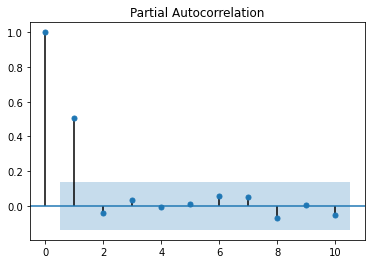

[ 1.          0.50549285 -0.04349406  0.03085008 -0.00452864  0.01164205
  0.05414861  0.0525279  -0.06836765  0.00549386 -0.05423122]


In [31]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df_simulated['X'],  nlags = nlag)

fig = tsaplots.plot_pacf(df_simulated['X'], lags = 10)
plt.show()
print(result)

factor value of 0.5 generates the graph closest to the provided ACF and PACF plots

## Justification

It is visible here that **factor = 0.5** generates a graph that is similar to the one provided. This can be explained by the fact that in the provided graph, the correlation value after 1 lag is approximately 0.5, as visible in the ACF and PACF plot. 

Because only AR(1) model was being considered, looking at 1 lag is enough. For an AR(2) model there would have been two different factors and we would haave had to look at both 1 lag and 2 lag correlations in the ACF.

From the provided graphs, it is also seen that ACF and PACF are being calculated for 10 lags. Hence the lag values for ACF and PACF have been set to 10. 